***Heathrow Meteo rain/ wheather prediction model***

In [1]:
import pandas as pd
import numpy as np
import scipy
import tensorflow as tf
import datetime , time
import os

In [2]:
data = pd.read_csv(r"C:\\Users\\Hemant\\Desktop\\Heathrow data analysis\\data\\HeathrowMeteo2010-2019.csv")
data.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES
0,UKM00003772,"HEATHROW, UK",51.478,-0.461,25.3,2010-01-01,0.0,",,S",0.8,"H,,S"
1,UKM00003772,"HEATHROW, UK",51.478,-0.461,25.3,2010-01-02,0.0,",,S",1.8,"H,,S"
2,UKM00003772,"HEATHROW, UK",51.478,-0.461,25.3,2010-01-03,0.0,",,S",0.4,"H,,S"
3,UKM00003772,"HEATHROW, UK",51.478,-0.461,25.3,2010-01-04,0.0,",,S",-2.8,"H,,S"
4,UKM00003772,"HEATHROW, UK",51.478,-0.461,25.3,2010-01-05,0.3,",,S",-1.3,"H,,S"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3621 entries, 0 to 3620
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          3621 non-null   object 
 1   NAME             3621 non-null   object 
 2   LATITUDE         3621 non-null   float64
 3   LONGITUDE        3621 non-null   float64
 4   ELEVATION        3621 non-null   float64
 5   DATE             3621 non-null   object 
 6   PRCP             3591 non-null   float64
 7   PRCP_ATTRIBUTES  3591 non-null   object 
 8   TAVG             3621 non-null   float64
 9   TAVG_ATTRIBUTES  3621 non-null   object 
dtypes: float64(5), object(5)
memory usage: 283.0+ KB


In [4]:
data.isnull().sum()

STATION             0
NAME                0
LATITUDE            0
LONGITUDE           0
ELEVATION           0
DATE                0
PRCP               30
PRCP_ATTRIBUTES    30
TAVG                0
TAVG_ATTRIBUTES     0
dtype: int64

In [5]:
data['PRCP'] = data['PRCP'].fillna(data['PRCP'].median())

In [6]:
data.isnull().sum()
df = data.drop(columns = ['NAME','STATION','PRCP_ATTRIBUTES','TAVG_ATTRIBUTES','LATITUDE','LONGITUDE','ELEVATION'])
df.head()

,DATE,PRCP,TAVG
0,2010-01-01,0.0,0.8
1,2010-01-02,0.0,1.8
2,2010-01-03,0.0,0.4
3,2010-01-04,0.0,-2.8
4,2010-01-05,0.3,-1.3


In [7]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [8]:
# df = df.sort_values('DATE')
# df.set_index('DATE', inplace=True)

In [9]:
df['Year'] = df['DATE'].dt.year
df['Month'] = df['DATE'].dt.month
df['Day'] = df['DATE'].dt.day
df['DayOfYear'] = df['DATE'].dt.dayofyear
df['WeekOfYear'] = df['DATE'].dt.isocalendar().week

In [10]:
print(df.head(5))

        DATE  PRCP  TAVG  Year  Month  Day  DayOfYear  WeekOfYear
0 2010-01-01   0.0   0.8  2010      1    1          1          53
1 2010-01-02   0.0   1.8  2010      1    2          2          53
2 2010-01-03   0.0   0.4  2010      1    3          3          53
3 2010-01-04   0.0  -2.8  2010      1    4          4           1
4 2010-01-05   0.3  -1.3  2010      1    5          5           1


In [11]:
df['RainTomorrow'] = (df['PRCP'].shift(-1) > 0).astype(int)
df = df.dropna()

In [12]:
df = df.drop_duplicates()
print(df.isnull().sum())

DATE            0
PRCP            0
TAVG            0
Year            0
Month           0
Day             0
DayOfYear       0
WeekOfYear      0
RainTomorrow    0
dtype: int64


In [13]:
df = df.drop(columns=['DATE'])
df['PRCP_Lag1'] = df['PRCP'].shift(1)
df['PRCP_Lag2'] = df['PRCP'].shift(2)
df['TAVG_Lag1'] = df['TAVG'].shift(1)
df['TAVG_Lag2'] = df['TAVG'].shift(2)

df['PRCP_3day_avg'] = df['PRCP'].rolling(3).mean()
df['PRCP_7day_avg'] = df['PRCP'].rolling(7).mean()

df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

# performance
df['DayOfYear_sin'] = np.sin(2 * np.pi * df['DayOfYear'] / 365)
df['DayOfYear_cos'] = np.cos(2 * np.pi * df['DayOfYear'] / 365)

df['PRCP_14day_avg'] = df['PRCP'].rolling(14).mean()
df['PRCP_30day_avg'] = df['PRCP'].rolling(30).mean()

df = df.dropna()


In [14]:
print("df columns: " , df.columns)
print('df shape' , df.shape)
print('df info: ', df.info())

df columns:  Index(['PRCP', 'TAVG', 'Year', 'Month', 'Day', 'DayOfYear', 'WeekOfYear',
       'RainTomorrow', 'PRCP_Lag1', 'PRCP_Lag2', 'TAVG_Lag1', 'TAVG_Lag2',
       'PRCP_3day_avg', 'PRCP_7day_avg', 'Month_sin', 'Month_cos',
       'DayOfYear_sin', 'DayOfYear_cos', 'PRCP_14day_avg', 'PRCP_30day_avg'],
      dtype='object')
df shape (3592, 20)
<class 'pandas.core.frame.DataFrame'>
Index: 3592 entries, 29 to 3620
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PRCP            3592 non-null   float64
 1   TAVG            3592 non-null   float64
 2   Year            3592 non-null   int32  
 3   Month           3592 non-null   int32  
 4   Day             3592 non-null   int32  
 5   DayOfYear       3592 non-null   int32  
 6   WeekOfYear      3592 non-null   UInt32 
 7   RainTomorrow    3592 non-null   int32  
 8   PRCP_Lag1       3592 non-null   float64
 9   PRCP_Lag2       3592 non-null   float64
 10  TAV

In [15]:
df = pd.DataFrame(df)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , roc_auc_score, f1_score , confusion_matrix

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import  LGBMClassifier
from xgboost import XGBClassifier


In [17]:
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

In [18]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=45)

In [19]:
print('X_train column:',X_train.columns)
# print('y_train column: ',y_train.columns)

X_train column: Index(['PRCP', 'TAVG', 'Year', 'Month', 'Day', 'DayOfYear', 'WeekOfYear',
       'PRCP_Lag1', 'PRCP_Lag2', 'TAVG_Lag1', 'TAVG_Lag2', 'PRCP_3day_avg',
       'PRCP_7day_avg', 'Month_sin', 'Month_cos', 'DayOfYear_sin',
       'DayOfYear_cos', 'PRCP_14day_avg', 'PRCP_30day_avg'],
      dtype='object')


In [20]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3592, 19)
(3592,)
(2873, 19)
(2873,)
(719, 19)
(719,)


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [22]:
# Sequential model
def model_sequential(X_train, y_train, epochs=10, batch_size=32, val_split=0.2):
    model1 = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    adam = Adam(learning_rate=0.01)
    model1.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

    history = model1.fit(
        X_train,
        y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=val_split
    )
    return model1 , history

# Enssemble model
def model_random_forest(X_train, y_train, n_estimator = 100, random_st=42):
    model2 = RandomForestClassifier(n_estimators = n_estimator, random_state = random_st)
    model2.fit(X_train, y_train)
    return model2

# Logistic Regression
def model_logistic_regression(X_train, y_train):
    model3 = LogisticRegression(max_iter=1000)
    model3.fit(X_train, y_train)
    return model3

# LGBM classifier model
def model_lgbm_classifier(X_train, y_train, n_estimator=100, random_st=42, learning_rate=0.1):
    model4 = LGBMClassifier(n_estimators= n_estimator, random_state = random_st, learning_rate = learning_rate)
    model4.fit(X_train, y_train)
    return model4

# XGBClassifier model
def model_XGBClassifier(X_train, y_train, n_estimator=100, random_st=42, learning_rate=0.1):
    model4 = XGBClassifier(n_estimators= n_estimator, random_state = random_st, learning_rate = learning_rate)
    model4.fit(X_train, y_train)
    return model4

In [23]:
# Sequential model training
model, history = model_sequential(X_train, y_train)

C:\Users\Hemant\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5928 - loss: 0.6821 - val_accuracy: 0.5965 - val_loss: 0.6558
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6136 - loss: 0.6526 - val_accuracy: 0.5878 - val_loss: 0.6605
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6287 - loss: 0.6449 - val_accuracy: 0.6226 - val_loss: 0.6550
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6372 - loss: 0.6433 - val_accuracy: 0.5896 - val_loss: 0.6720
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6237 - loss: 0.6441 - val_accuracy: 0.6226 - val_loss: 0.6570
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6507 - loss: 0.6469 - val_accuracy: 0.6243 - val_loss: 0.6601
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6634 - loss: 0.6392 - val_accuracy: 0.6174 - val_loss: 0.6573
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6589 - loss: 0.6421 - val_accuracy: 0.6191 - val_loss

In [24]:
# prediction 
prob_seq = model.predict(X_test)
pred_seq = (prob_seq > 0.5).astype(int)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [25]:
# Random forest classifier training
model_rf = model_random_forest(X_train, y_train)

In [26]:
# prediction
pred_rf = model_rf.predict(X_test)
prob_rf = model_rf.predict_proba(X_test)[:,1]

In [27]:
# Logistic regression training
model_lr = model_logistic_regression(X_train, y_train)

In [28]:
# prediction
pred_lr = model_lr.predict(X_test)
prob_lr = model_lr.predict_proba(X_test)[:,1]

In [29]:
# LGBM training
model_lgbm = model_lgbm_classifier(X_train, y_train)

[LightGBM] [Info] Number of positive: 1351, number of negative: 1522
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2775
[LightGBM] [Info] Number of data points in the train set: 2873, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.470240 -> initscore=-0.119180
[LightGBM] [Info] Start training from score -0.119180


In [30]:
# prediction
pred_lgbm = model_lgbm.predict(X_test)
prob_lgbm = model_lgbm.predict_proba(X_test)[:,1]

C:\Users\Hemant\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hemant\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [31]:
# XGB training
model_xgb = model_XGBClassifier(X_train, y_train)

In [32]:
# Prediction 
pred_xgb = model_xgb.predict(X_test)
prob_xgb = model_xgb.predict_proba(X_test)[:,1]

### Evaluation

In [33]:
def evaluate_model(name, y_test, pred, prob):
    print(f"\n{name} Results:")
    print("Accuracy: ", accuracy_score(y_test, pred))
    print("F1 Score: ", f1_score(y_test, pred))
    print("ROC-AUC: ", roc_auc_score(y_test, prob))
    print("classification_report: \n", classification_report(y_test , pred))

In [34]:
evaluate_model("Sequential", y_test, pred_seq, prob_seq)


Sequential Results:
Accuracy:  0.6703755215577191
F1 Score:  0.6279434850863422
ROC-AUC:  0.7013329126902753
classification_report: 
               precision    recall  f1-score   support

           0       0.72      0.69      0.70       409
           1       0.61      0.65      0.63       310

    accuracy                           0.67       719
   macro avg       0.67      0.67      0.67       719
weighted avg       0.67      0.67      0.67       719



In [35]:
evaluate_model("Random Forest Classifier", y_test, pred_rf, prob_rf)


Random Forest Classifier Results:
Accuracy:  0.650904033379694
F1 Score:  0.5971107544141252
ROC-AUC:  0.687727738780661
classification_report: 
               precision    recall  f1-score   support

           0       0.69      0.69      0.69       409
           1       0.59      0.60      0.60       310

    accuracy                           0.65       719
   macro avg       0.64      0.64      0.64       719
weighted avg       0.65      0.65      0.65       719



In [36]:
evaluate_model("Logistic Regression", y_test, pred_lr, prob_lr)


Logistic Regression Results:
Accuracy:  0.6481223922114048
F1 Score:  0.5537918871252204
ROC-AUC:  0.6935089518100797
classification_report: 
               precision    recall  f1-score   support

           0       0.67      0.76      0.71       409
           1       0.61      0.51      0.55       310

    accuracy                           0.65       719
   macro avg       0.64      0.63      0.63       719
weighted avg       0.64      0.65      0.64       719



In [37]:
evaluate_model("LightGBM Classifier", y_test, pred_lgbm, prob_lgbm)


LightGBM Classifier Results:
Accuracy:  0.6425591098748261
F1 Score:  0.5901116427432217
ROC-AUC:  0.6873176117990378
classification_report: 
               precision    recall  f1-score   support

           0       0.69      0.68      0.68       409
           1       0.58      0.60      0.59       310

    accuracy                           0.64       719
   macro avg       0.64      0.64      0.64       719
weighted avg       0.64      0.64      0.64       719



In [38]:
evaluate_model("XGBoost Classifier", y_test, pred_xgb, prob_xgb)


XGBoost Classifier Results:
Accuracy:  0.6481223922114048
F1 Score:  0.5912762520193862
ROC-AUC:  0.6904093382758894
classification_report: 
               precision    recall  f1-score   support

           0       0.69      0.69      0.69       409
           1       0.59      0.59      0.59       310

    accuracy                           0.65       719
   macro avg       0.64      0.64      0.64       719
weighted avg       0.65      0.65      0.65       719



### The most efficient model is XGBoost Classifier model ###
- Check the performance by rolling the year 2019 

In [39]:
train = df[df['Year'] < 2019]
test = df[df['Year'] == 2019]

X_train = train.drop(columns=['RainTomorrow'])
y_train = train['RainTomorrow']

X_test = test.drop(columns=['RainTomorrow'])
y_test = test['RainTomorrow']


In [40]:
model_xgb = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

model_xgb.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [41]:
pred_xgb = model_xgb.predict(X_test)
prob_xgb = model_xgb.predict_proba(X_test)[:,1]

In [42]:
print("Accuracy:", accuracy_score(y_test, pred_xgb))
print("F1 Score:", f1_score(y_test, pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, prob_xgb))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, pred_xgb))

print("\nClassification Report:")
print(classification_report(y_test, pred_xgb))

Accuracy: 0.6565096952908587
F1 Score: 0.5974025974025974
ROC-AUC: 0.7305535009861933

Confusion Matrix:
[[145  47]
 [ 77  92]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.76      0.70       192
           1       0.66      0.54      0.60       169

    accuracy                           0.66       361
   macro avg       0.66      0.65      0.65       361
weighted avg       0.66      0.66      0.65       361



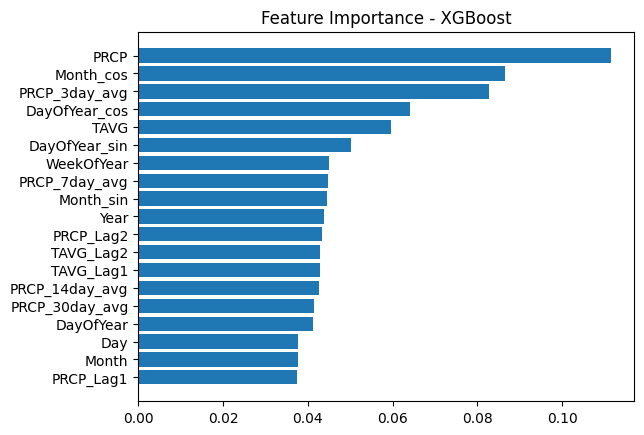

In [43]:
import matplotlib.pyplot as plt
importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model_xgb.feature_importances_
})

importance = importance.sort_values(by='Importance', ascending=False)

plt.figure()
plt.barh(importance['Feature'], importance['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance - XGBoost")
plt.show()

In [ ]:
import joblib

joblib.dump(model_xgb, "C:\\Users\\Hemant\\Desktop\\Heathrow data analysis\\models\\Heathrow_rain_model.pkl")
